# EDA - Visualización

**Visualización de datos y creación de resúmenes estadísticos.**
<BR>

Hacer visualizaciones informativas (también llamadas gráficos o plots) es una de las tareas más importantes en el análisis de datos.
Estas visualizaciones pueden tener distintos propósitos:

* Exploratorio: para detectar valores atípicos (outliers), identificar la necesidad de transformar datos o generar ideas para modelos.

* Comunicativo o final: en algunos casos, el objetivo es construir una visualización interactiva (por ejemplo, para la web) como producto final del análisis.
<BR>

Python ofrece muchas bibliotecas para crear visualizaciones estáticas o dinámicas. Sin embargo, la más importante es Matplotlib, y muchas otras herramientas se basan en ella. Por ello veremos también Seaborn (sns)

Armamos una función que genera/simula calificaciones de estudiantes

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
from scipy.stats import truncnorm
import numpy as np

def gen_notas(media, desvio, n, minimo=1, maximo=10):
    """
    Genera una distribución normal truncada entre 'minimo' y 'maximo'.

    Parámetros:
    -----------
    media : float
        Media (mu) de la distribución.
    desvio : float
        Desviación estándar (sigma).
    n : int
        Número de observaciones a generar.
    minimo : float, opcional
        Valor mínimo permitido (default = 1).
    maximo : float, opcional
        Valor máximo permitido (default = 10).

    Retorna:
    --------
    np.ndarray
        Array de NumPy con los valores generados.
    """
    # Calcular los límites normalizados
    a, b = (minimo - media) / desvio, (maximo - media) / desvio

    # Generar muestra truncada
    muestra = truncnorm(a, b, loc=media, scale=desvio).rvs(n).round(1)

    return np.array(muestra)

## Ejemplo de visualización con Matplotlib


### Generar variables y valores

In [43]:
# Generamos notas para un grupo de estudiantes, usando la funcion gen_notas()
# array = gen_notas(mean, desv, n)
notas = pd.DataFrame(
    {
        'grupo_1': gen_notas(8, 1, 100000),
        'grupo_2': gen_notas(5, 2, 100000),
    }
)
notas.describe()

,grupo_1,grupo_2
count,100000.000000,100000.000000
mean,7.946746,5.079260
std,0.941803,1.835332
min,3.600000,1.000000
25%,7.300000,3.800000
50%,8.000000,5.000000
75%,8.600000,6.400000
max,10.000000,10.000000


### Histograma simple

In [ ]:
import numpy as np

x = np.random.randn(1000)
h = 3.5 * np.std(x) / (len(x) ** (1/3))
bins = int((x.max() - x.min()) / h)
print(bins)

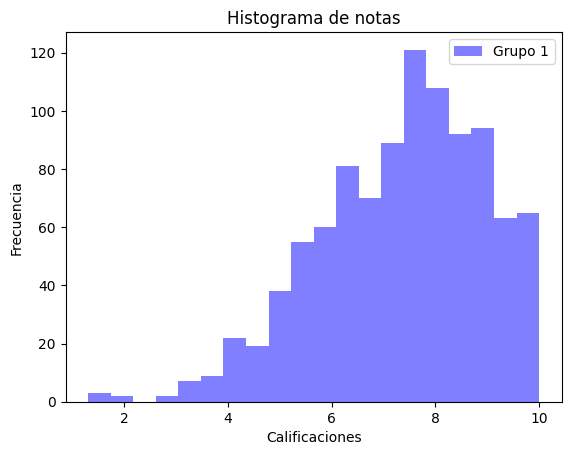

In [40]:
# Veamos de graficar un histograma (distribución de las notas)
# Luego probemos a agregar bins, color, alpha
plt.hist(notas["grupo_1"], bins="auto", color="blue", alpha=0.5, label="Grupo 1")
plt.title("Histograma de notas")
plt.legend()
plt.xlabel("Calificaciones")
plt.ylabel("Frecuencia")
plt.show()

### Histograma comparativo - Versión 1

In [ ]:
# Veamos un resumen estadístico
notas.describe()

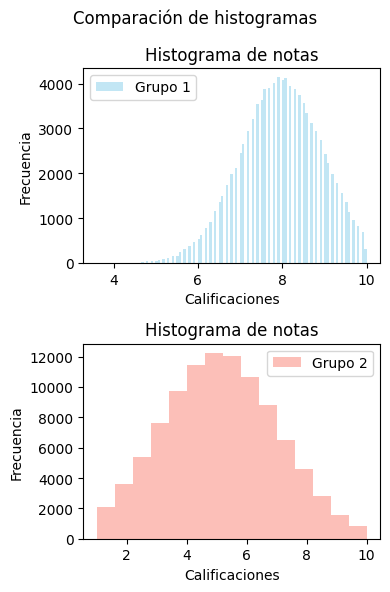

In [54]:
# Queremos hacer un gráfico, pero comparativo

plt.figure(figsize=(4, 6))

# Grupo 1
plt.subplot(2,1,1) # fila / columna / celda
plt.hist(notas["grupo_1"], bins="auto", color="skyblue", alpha=0.5, label="Grupo 1")
plt.title("Histograma de notas")
plt.legend()
plt.xlabel("Calificaciones")
plt.ylabel("Frecuencia")
# Grupo 2
plt.subplot(2,1,2) # fila / columna / celda
plt.hist(notas["grupo_2"], bins=15, color="salmon", alpha=0.5, label="Grupo 2")
plt.title("Histograma de notas")
plt.legend()
plt.xlabel("Calificaciones")
plt.ylabel("Frecuencia")

plt.suptitle("Comparación de histogramas")
plt.tight_layout()
plt.show()


### Histograma comparativo - Versión 2

In [52]:
# Queremos hacer un gráfico, pero comparativo
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

### Boxplot simple

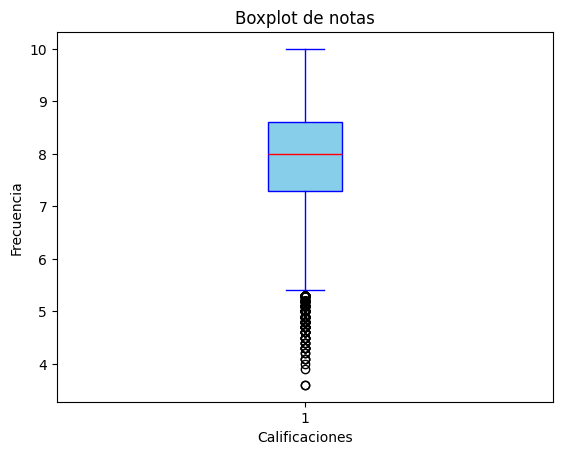

In [58]:
# Veamos como graficar un boxplot
plt.boxplot(notas["grupo_1"],
                patch_artist=True,                # habilita color de relleno
    boxprops=dict(facecolor="skyblue", color="blue"),  # color de la caja
    medianprops=dict(color="red"),    # color de la línea de la mediana
    whiskerprops=dict(color="blue"),  # color de los bigotes
    capprops=dict(color="blue")      # color de las “tapitas”
            )
plt.title("Boxplot de notas")
plt.xlabel("Calificaciones")
plt.ylabel("Frecuencia")
plt.show()

## Ejemplo de visualización con Seaborn

Seaborn, que se basa en Matplotlib, ofrece una interfaz más sencilla para crear
gráficos estadísticos. Continuando con nuestro conjunto de datos anterior, podemos
usar Seaborn para crear un gráfico de distribución.


Sintaxis:
<BR>
`sns.barplot(x='columna_x', y='columna_y', data=df)`

Ventajas de sns.histplot()

* Integra directamente con pandas (solo pasás data= , x=).
* Tiene parámetros como hue, kde, stat, etc.
* Estéticamente más agradable (usa el estilo por defecto de Seaborn).

### Histograma simple

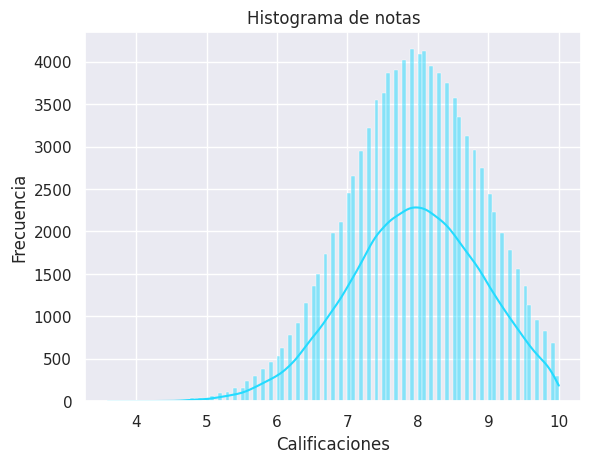

In [66]:

sns.set_theme(style="darkgrid", palette="cool")
sns.histplot(data=notas,
             x="grupo_1",
             bins="auto",
             kde=True)
plt.title("Histograma de notas")
plt.xlabel("Calificaciones")
plt.ylabel("Frecuencia")
plt.show()

### Histograma comparativo - Version 1

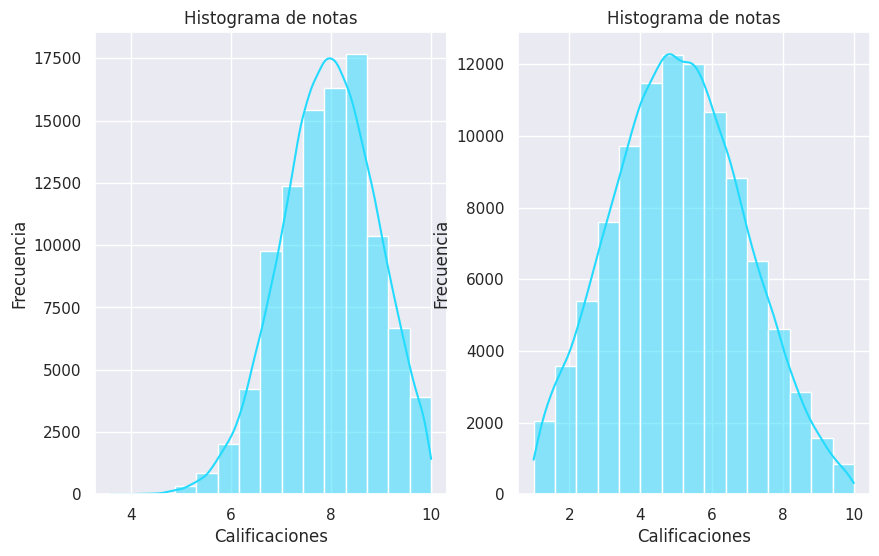

In [69]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.set_theme(style="darkgrid", palette="cool")
sns.histplot(data=notas,
             x="grupo_1",
             bins=15,
             kde=True)
plt.title("Histograma de notas")
plt.xlabel("Calificaciones")
plt.ylabel("Frecuencia")
plt.subplot(1,2,2)
sns.set_theme(style="darkgrid", palette="cool")
sns.histplot(data=notas,
             x="grupo_2",
             bins=15,
             kde=True)
plt.title("Histograma de notas")
plt.xlabel("Calificaciones")
plt.ylabel("Frecuencia")


plt.show()

### Histograma comparativo - Versión 2

### Boxplot simple

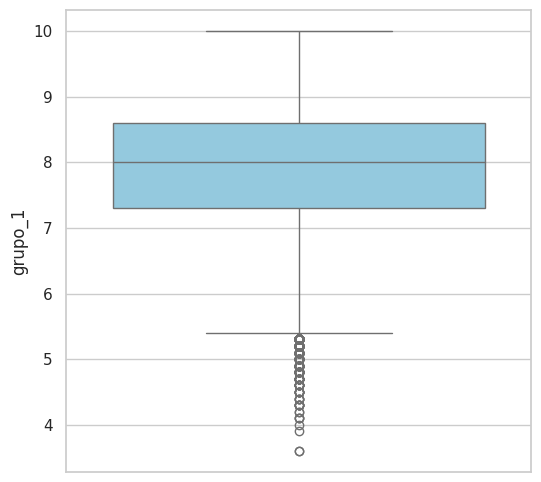

In [79]:
plt.figure(figsize=(6,6))
sns.reset_defaults()
sns.set_theme(style="whitegrid", palette="cool")
sns.boxplot(
    data=notas,
    y="grupo_1",
    color="skyblue",
)
plt.show()


### Boxplot comparativo

# EDA: Base de datos "Tips" de Seaborn
En esta sección, realizaremos un análisis exploratorio utilizando la base de datos
"tips" de Seaborn. Esta base de datos recopila información sobre las propinas que
se dejan en un restaurante, incluyendo datos como el total de la cuenta, el
porcentaje de propina, el día de la semana, y la cantidad de personas en la mesa.
Primero, cargaremos el conjunto de datos y realizaremos diferentes análisis y
visualizaciones para extraer información significativa.

* `total_bill`: Monto total de la cuenta.
* `tip`: Monto de la propina.
* `sex`: Género del cliente.
* `smoker`: Indica si el cliente es fumador o no.
* `day`: Día de la semana.
* `time`: Hora de la comida (almuerzo o cena).
* `size`: Número de personas en la mesa.

## Importamos el dataset

In [80]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Cargar la base de datos tips de Seaborn
tips = sns.load_dataset("tips")
# Visualizar las primeras filas del DataFrame
# tips.head()
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [81]:
# Veamos algunos datos estadísticos
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## Graficamos Histogramas

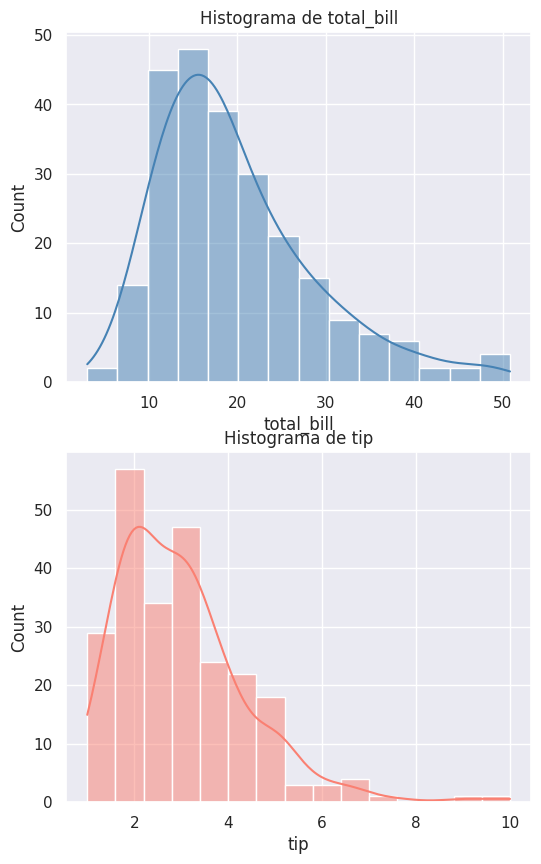

In [85]:
# Seteo el lienzo de ancho (10) x alto (6)
plt.figure(figsize=(6, 10))

# Subplot 1 (n_filas, n_columnas, celda_ocupa)
plt.subplot(2,1,1)
sns.set_theme(style="darkgrid", palette="cool")
sns.histplot(data=tips,
             x="total_bill",
             bins="auto",
             kde=True,
             color="steelblue")
plt.title("Histograma de total_bill")

# Subplot 1 (n_filas, n_columnas, celda_ocupa)
plt.subplot(2,1,2)
sns.set_theme(style="darkgrid", palette="cool")
sns.histplot(data=tips,
             x="tip",
             bins=15,
             kde=True,
             color="salmon")
plt.title("Histograma de tip")
plt.show()

## Graficamos Boxplots

## Que relación hay entre la cuenta "bill" y la propina "tip"?

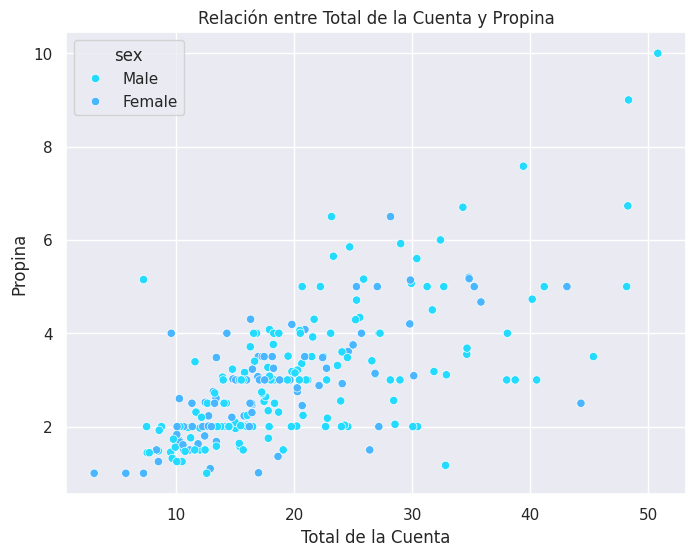

In [88]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tips, x='total_bill', hue="sex", y='tip')
plt.title('Relación entre Total de la Cuenta y Propina')
plt.xlabel('Total de la Cuenta')
plt.ylabel('Propina')
plt.show()